In [3]:
import pandas as pd
import numpy as np

In [4]:
s=pd.Series(np.random.randint(0,7,size=10))
s

,0
0,6
1,6
2,1
3,4
4,2
5,6
6,5
7,6
8,3
9,1


In [5]:
s.value_counts

<bound method IndexOpsMixin.value_counts of 0    6
1    6
2    1
3    4
4    2
5    6
6    5
7    6
8    3
9    1
dtype: int64>

In [6]:
s=pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()

,0
0,a
1,b
2,c
3,aaba
4,baca
5,NaN
6,caba
7,dog
8,cat


In [7]:
df=pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.171849,-0.446735,-0.997251,0.039997
1,0.216064,0.680851,1.492241,0.401266
2,0.143127,1.406682,-0.020683,-0.972983
3,1.658195,-1.193923,-0.535750,0.226254
4,-0.171245,1.089977,-0.266405,0.128683
5,0.547383,-0.120089,1.291893,-0.312521
6,-0.959889,0.762933,-1.822302,0.487220
7,0.111175,-0.238013,0.201144,-0.288965
8,2.014445,0.135922,-0.262216,0.460700
9,1.467592,-0.365768,0.486093,0.865769


In [8]:
pieces=[df[:3],df[3:7],df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.171849,-0.446735,-0.997251,0.039997
1,0.216064,0.680851,1.492241,0.401266
2,0.143127,1.406682,-0.020683,-0.972983
3,1.658195,-1.193923,-0.535750,0.226254
4,-0.171245,1.089977,-0.266405,0.128683
5,0.547383,-0.120089,1.291893,-0.312521
6,-0.959889,0.762933,-1.822302,0.487220
7,0.111175,-0.238013,0.201144,-0.288965
8,2.014445,0.135922,-0.262216,0.460700
9,1.467592,-0.365768,0.486093,0.865769


In [9]:
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
left

,key,lval
0,foo,1
1,foo,2


In [10]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [11]:
left=pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
left

,key,lval
0,foo,1
1,bar,2


In [12]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [13]:
df=pd.DataFrame({'A':["foo","bar","foo","bar","foo","bar","foo","foo"],
'B':['one','one','two','three','two','two','one','three'],
'C':np.random.randn(8),
'D':np.random.randn(8)})
df


,A,B,C,D
0,foo,one,-0.989902,0.245637
1,bar,one,1.126283,2.147151
2,foo,two,0.704383,-0.726915
3,bar,three,0.624776,0.687790
4,foo,two,-1.384664,0.760935
5,bar,two,-0.681170,-0.936739
6,foo,one,-0.807673,-0.006326
7,foo,three,-0.507990,-0.021077


In [14]:
df.groupby("A").sum()

,B,C,D
A,,,
bar,onethreetwo,1.069889,1.898202
foo,onetwotwoonethree,-2.985846,0.252253


In [15]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.126283  2.147151
    three  0.624776  0.687790
    two   -0.681170 -0.936739
foo one   -1.797575  0.239311
    three -0.507990 -0.021077
    two   -0.680280  0.034019

In [16]:
tuples=list(zip(*[['bar','bar','baz','baz',
'foo','foo','qux','qux'],
['one','two','one','two',
'one','two','one','two']]))
index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2=df[:4]
df2

A         B
first second                    
bar   one     0.597649 -0.037039
      two     0.626262  0.040596
baz   one    -0.324877  0.919619
      two    -0.139051  0.198263

In [17]:
stacked=df2.stack()
stacked

first  second   
bar    one     A    0.597649
               B   -0.037039
       two     A    0.626262
               B    0.040596
baz    one     A   -0.324877
               B    0.919619
       two     A   -0.139051
               B    0.198263
dtype: float64

In [18]:
stacked.unstack()

A         B
first second                    
bar   one     0.597649 -0.037039
      two     0.626262  0.040596
baz   one    -0.324877  0.919619
      two    -0.139051  0.198263

In [19]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.597649  0.626262
      B -0.037039  0.040596
baz   A -0.324877 -0.139051
      B  0.919619  0.198263

In [20]:
df=pd.DataFrame({'A':['one','one','two','three']*3,
'B':['A','B','C']*4,
'C':['foo','foo','foo','bar','bar','bar']*2,
'D':np.random.randn(12),
'E':np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.295595,0.183664
1,one,B,foo,1.079194,0.375439
2,two,C,foo,-1.277390,-0.857709
3,three,A,bar,0.549658,1.042736
4,one,B,bar,-0.873244,0.633959
5,one,C,bar,-0.726972,-0.709368
6,two,A,foo,-1.620230,-1.907338
7,three,B,foo,-0.124407,1.035744
8,one,C,foo,0.354807,-0.881680
9,one,A,bar,-0.065645,-0.730158


In [21]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A -0.065645 -0.295595
      B -0.873244  1.079194
      C -0.726972  0.354807
three A  0.549658       NaN
      B       NaN -0.124407
      C  0.775753       NaN
two   A       NaN -1.620230
      B -0.324316       NaN
      C       NaN -1.277390

In [22]:
rng=pd.date_range('1/1/2012',periods=100,freq='S')
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5Min').sum()


<ipython-input-22-fd9c20ed5fa6>:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng=pd.date_range('1/1/2012',periods=100,freq='S')


,0
2012-01-01,22450


In [23]:
rng=pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts=pd.Series(np.random.randn(len(rng)),rng)
ts

,0
2012-03-06,-0.584267
2012-03-07,-0.274141
2012-03-08,-2.469753
2012-03-09,0.949022
2012-03-10,1.289394


In [24]:
ts_utc=ts.tz_localize('UTC')
ts_utc

,0
2012-03-06 00:00:00+00:00,-0.584267
2012-03-07 00:00:00+00:00,-0.274141
2012-03-08 00:00:00+00:00,-2.469753
2012-03-09 00:00:00+00:00,0.949022
2012-03-10 00:00:00+00:00,1.289394


In [25]:
rng=pd.date_range('1/1/2012',periods=5,freq='M')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

<ipython-input-25-b86ad53a1b74>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng=pd.date_range('1/1/2012',periods=5,freq='M')


,0
2012-01-31,-0.527819
2012-02-29,-0.513343
2012-03-31,0.871698
2012-04-30,-1.124448
2012-05-31,0.111487


In [26]:
ps = ts.to_period()
ps

,0
2012-01,-0.527819
2012-02,-0.513343
2012-03,0.871698
2012-04,-1.124448
2012-05,0.111487


In [27]:
ps.to_timestamp()

,0
2012-01-01,-0.527819
2012-02-01,-0.513343
2012-03-01,0.871698
2012-04-01,-1.124448
2012-05-01,0.111487


In [28]:
prng=pd.period_range('1990Q1','2000Q4',freq='Q-NOV')
ts=pd.Series(np.random.randn(len(prng)),prng)
ts_index=(prng.asfreq('M','e')+1).asfreq('H','s')+9
ts.head()



<ipython-input-28-b357a9d66cc1>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts_index=(prng.asfreq('M','e')+1).asfreq('H','s')+9


,0
1990Q1,-0.301326
1990Q2,0.929436
1990Q3,0.771474
1990Q4,1.551828
1991Q1,0.051882


In [29]:
df=pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df.head()

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a


In [30]:
df["grade"]=df["raw_grade"].astype("category")
In[125]:df["grade"]

In [31]:

df["grade"] = df["grade"].cat.rename_categories({"a": "very good", "b": "good", "e": "very bad"})

In [32]:
df['grade']=df['grade'].cat.set_categories(["very bad","bad","medium","good","very good"])
df['grade']

,grade
0,very good
1,good
2,good
3,very good
4,very good
5,very bad


In [33]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [34]:
df.groupby('grade').size()

<ipython-input-34-20427317a7bb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('grade').size()


,0
grade,
very bad,1
bad,0
medium,0
good,2
very good,3


In [35]:
import matplotlib.pyplot as plt
plt.close('all')

<Axes: >

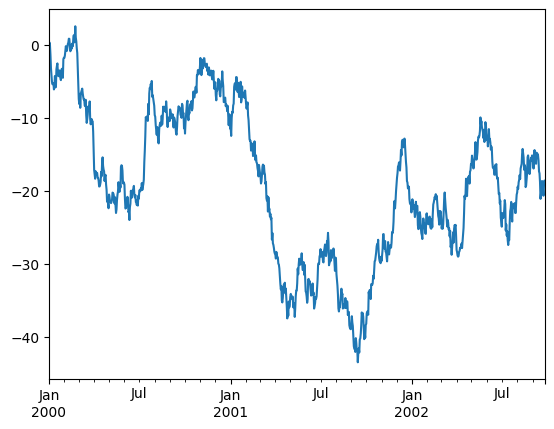

In [36]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

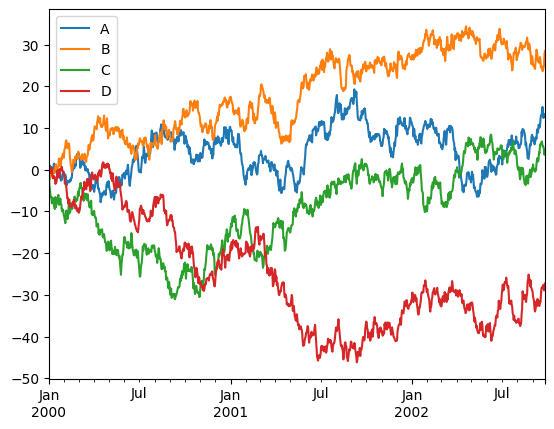

In [37]:
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])
df=df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [38]:
df.to_csv('foo.csv')
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.544807,-0.923405,-1.202067,0.012658
1,2000-01-02,-0.052635,-2.341021,-3.761918,0.502248
2,2000-01-03,0.986284,-1.215868,-4.745074,0.516773
3,2000-01-04,0.381624,0.179088,-6.063331,-0.799305
4,2000-01-05,0.359236,-0.838160,-6.541881,0.335687
...,...,...,...,...,...
995,2002-09-22,13.841997,23.747830,5.716804,-27.880824
996,2002-09-23,12.433452,24.575824,5.379035,-27.577220
997,2002-09-24,13.411815,25.095547,4.984471,-28.925941
998,2002-09-25,13.274461,27.861574,3.606758,-28.653153


In [39]:
df.to_hdf('foo.h5','df')
pd.read_hdf('foo.h5','df')

<ipython-input-39-288774afcce7>:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf('foo.h5','df')


,A,B,C,D
2000-01-01,0.544807,-0.923405,-1.202067,0.012658
2000-01-02,-0.052635,-2.341021,-3.761918,0.502248
2000-01-03,0.986284,-1.215868,-4.745074,0.516773
2000-01-04,0.381624,0.179088,-6.063331,-0.799305
2000-01-05,0.359236,-0.838160,-6.541881,0.335687
...,...,...,...,...
2002-09-22,13.841997,23.747830,5.716804,-27.880824
2002-09-23,12.433452,24.575824,5.379035,-27.577220
2002-09-24,13.411815,25.095547,4.984471,-28.925941
2002-09-25,13.274461,27.861574,3.606758,-28.653153


In [40]:
df.to_excel('foo.xlsx',sheet_name='Sheet1')
pd.read_excel('foo.xlsx','Sheet1',index_col=None,na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.544807,-0.923405,-1.202067,0.012658
1,2000-01-02,-0.052635,-2.341021,-3.761918,0.502248
2,2000-01-03,0.986284,-1.215868,-4.745074,0.516773
3,2000-01-04,0.381624,0.179088,-6.063331,-0.799305
4,2000-01-05,0.359236,-0.838160,-6.541881,0.335687
...,...,...,...,...,...
995,2002-09-22,13.841997,23.747830,5.716804,-27.880824
996,2002-09-23,12.433452,24.575824,5.379035,-27.577220
997,2002-09-24,13.411815,25.095547,4.984471,-28.925941
998,2002-09-25,13.274461,27.861574,3.606758,-28.653153


In [41]:
s=pd.Series(np.random.randn(5),index=['a','b','c','d','e'])
s

,0
a,-0.402140
b,0.581604
c,0.453340
d,0.140809
e,-0.474374


In [42]:
d={"b":1,"a":0,"c":2}
pd.Series(d)

,0
b,1
a,0
c,2


In [43]:
d={"a":0.0,"b":1.0,"c":2.0}
pd.Series(d)

,0
a,0.0
b,1.0
c,2.0


In [44]:
pd.Series(d,index=['b','c','d','a'])

,0
b,1.0
c,2.0
d,NaN
a,0.0


In [45]:
pd.Series(5.,index=['a','b','c','d','e'])

,0
a,5.0
b,5.0
c,5.0
d,5.0
e,5.0


In [46]:
s[0]

<ipython-input-46-c9c96910e542>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[0]


-0.4021403444837073

In [47]:
s[:3]

,0
a,-0.402140
b,0.581604
c,0.453340


In [48]:
s[s>s.median()]

,0
b,0.581604
c,0.453340


In [49]:
s[[4,3,1]]

<ipython-input-49-8fa15a5a4312>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[[4,3,1]]


,0
e,-0.474374
d,0.140809
b,0.581604


In [50]:
np.exp(s)

,0
a,0.668887
b,1.788905
c,1.573559
d,1.151205
e,0.622274


In [51]:
s.array

<NumpyExtensionArray>
[-0.4021403444837073,  0.5816039402346141,   0.453339823143209,
  0.1408094583625387,  -0.474374200027371]
Length: 5, dtype: float64

In [52]:
s.to_numpy()

array([-0.40214034,  0.58160394,  0.45333982,  0.14080946, -0.4743742 ])

In [53]:
s["a"]

-0.4021403444837073

In [54]:
s['e']=12.0
s

,0
a,-0.402140
b,0.581604
c,0.453340
d,0.140809
e,12.000000


In [55]:
np.exp(s)

,0
a,0.668887
b,1.788905
c,1.573559
d,1.151205
e,162754.791419


In [56]:
s[1:] + s[:-1]

,0
a,NaN
b,1.163208
c,0.906680
d,0.281619
e,NaN


In [57]:
s=pd.Series(np.random.randint(5),name="something")
s

,something
0,2


In [58]:
s2=s.rename("different")
s2.name

'different'

In [59]:
d={"one":pd.Series([1.,2.,3.],index=["a","b","c"]),
"two":pd.Series([1.,2.,3.,4.],index=["a","b","c","d"])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [60]:
pd.DataFrame(d,index=["d","b","a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [61]:
pd.DataFrame(d,index=["d","b","a"],columns=["two","three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [62]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [63]:
df.columns

Index(['one', 'two'], dtype='object')

In [64]:
d={"one":[1.,2.,3.,4.],
"two":[4.,3.,2.,1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [65]:
pd.DataFrame(d,index=["a","b","c","d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [66]:
data=np.zeros((2,),dtype=[('A','i4'),('B','f4'),('C','a10')])
data[:]=[(1,2.,'Hello'),(2,3.,"World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [67]:
pd.DataFrame(data,index=["first","second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [68]:
pd.DataFrame(data,columns=['C','A','B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [69]:
data2=[{'a':1,'b':2},{'a':5,'b':10,'c':20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [70]:
pd.DataFrame(data2,index=["first","second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [71]:
pd.DataFrame(data2,columns=['a','b'])

,a,b
0,1,2
1,5,10


In [72]:
pd.DataFrame({
    ('a','b'):{('A','B'):1,('A','C'):2},
    ('a','a'):{('A','C'):3,('A','B'):4},
    ('a','c'):{('A','B'):5,('A','C'):6},
    ('b','a'):{('A','C'):7,('A','B'):8},
    ('b','b'):{('A','D'):9,('A','B'):10}
}

)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [73]:
from collections import namedtuple
Point=namedtuple('Point',['x','y'])
pd.DataFrame([Point(0,0),Point(0,3),(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


In [74]:
Point3D=namedtuple('Point3D',['x','y','z'])
pd.DataFrame([Point3D(0,0,0),Point3D(0,3,5),(2,3)])


,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [75]:
from dataclasses import make_dataclass
Point=make_dataclass("Point",[("x",int),("y",int)])
pd.DataFrame([Point(0,0),Point(0,3),Point(2,3)]) # Corrected the third element to Point(2,3)

,x,y
0,0,0
1,0,3
2,2,3


In [76]:
Point3D=namedtuple('Point3D',['x','y','z'])
pd.DataFrame([Point3D(0,0,0),Point3D(0,3,5),Point3D(2,3,0)]) # Provide a value for 'z', e.g., 0

,x,y,z
0,0,0,0
1,0,3,5
2,2,3,0


In [77]:
from dataclasses import make_dataclass
Point=make_dataclass("Point",[("x",int),("y",int)])
pd.DataFrame([Point(0,0),Point(0,3),Point(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


In [78]:
pd.DataFrame.from_dict(dict([('A',[1,2,3]),('B',[4,5,6])])
)

,A,B
0,1,4
1,2,5
2,3,6


In [79]:
pd.DataFrame.from_dict(dict([('A',[1,2,3]),('B',[4,5,6])],orient='index',columns=['one','two','three']),)

,A,B,orient,columns
0,1,4,index,one
1,2,5,index,two
2,3,6,index,three


In [80]:
pd.DataFrame.from_records(data,index=['C'])

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [81]:
df['three']=df['one']*df['two']
df['flag']=df['one']>2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [82]:
del df['two']
three = df.pop('three')
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [83]:
df['foo']='bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [84]:
df["one_trunc"]=df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [85]:
df.insert(1,'bar',df['one'])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [86]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
path='/content/drive/MyDrive/iris.csv'
df=pd.read_csv(path)
df.describe
print(df)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [88]:
iris=pd.read_csv('/content/drive/MyDrive/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
iris.assign(sepal_ratio=iris['SepalWidthCm']/iris['SepalLengthCm']).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [113]:
iris.assign(petal_ratio=iris['PetalWidthCm']/iris['PetalLengthCm']).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,petal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.142857
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.142857
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.153846
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.133333
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.142857


<Axes: title={'center': 'Sepal Ratio vs Petal Ratio'}, xlabel='sepal_ratio', ylabel='petal_ratio'>

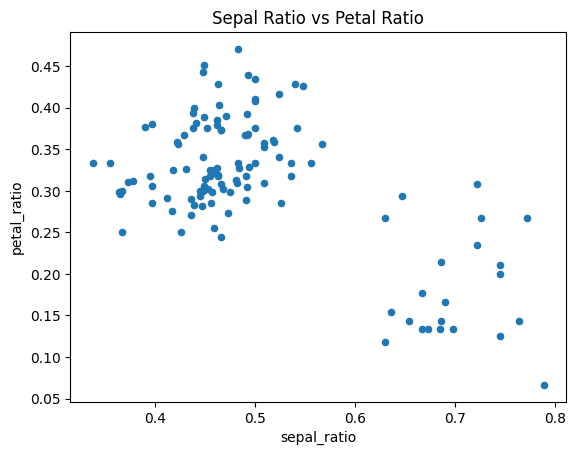

In [115]:
(iris.query('SepalLengthCm>5.0')
 .assign(sepal_ratio=lambda x:x['SepalWidthCm']/x['SepalLengthCm'],petal_ratio=lambda x:x['PetalWidthCm']/x['PetalLengthCm'])
 .plot(kind='scatter',x='sepal_ratio',y='petal_ratio',title='Sepal Ratio vs Petal Ratio'))

In [90]:
dfa=pd.DataFrame({"A":[1,2,3],"B":[4,5,6]})
dfa.assign(C=lambda x:x['A']+x['B'],D=lambda x:x['A']+x['C'])


,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [91]:
df=pd.DataFrame(np.random.randn(10,4),columns=['A','B','C','D'])
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,1.678095,-3.113528,0.521708,NaN
1,0.653435,-0.093604,1.062453,NaN
2,-0.167407,0.677838,0.120392,NaN
3,1.438413,-0.559441,1.400175,NaN
4,-0.848736,0.573108,-1.336867,NaN
5,-1.627417,1.858909,-0.314368,NaN
6,-0.034547,0.372463,1.786999,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [92]:
df1=pd.DataFrame({'a':[1,0,1],'b':[0,1,1]},dtype=bool)
df2=pd.DataFrame({'a':[0,1,1],'b':[1,1,0]},dtype=bool)
df1&df2

,a,b
0,False,False
1,False,True
2,True,False


In [93]:
df1|df2

,a,b
0,True,True
1,True,True
2,True,True


In [94]:
df1^df2

,a,b
0,True,True
1,True,False
2,False,True


In [95]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [96]:
np.exp(df)

,A,B,C,D
0,1.363671,0.143306,1.860721,2.779076
1,0.366531,0.707480,1.178264,0.169450
2,0.969743,6.393850,2.629306,2.490939
3,2.174107,0.952092,3.124333,0.269463
4,0.821135,1.149670,1.171992,0.071644
5,1.513411,1.799704,1.058850,1.325731
6,0.656791,1.678336,4.723594,1.031152
7,1.833773,1.610385,2.537340,3.048615
8,1.954205,0.433501,1.534350,0.691909
9,0.647862,1.449477,1.614497,0.419511


In [97]:
ser=pd.Series([1,2,3,4])
np.exp(ser)

,0
0,2.718282
1,7.389056
2,20.085537
3,54.598150


In [98]:
ser1=pd.Series([1,2,3],index=["a",'b','c'])
ser2=pd.Series([1,3,5],index=["a",'c','d'])
ser1

,0
a,1
b,2
c,3


In [99]:
np.remainder(ser1,ser2)

,0
a,0.0
b,NaN
c,0.0
d,NaN


In [127]:
ser3=pd.Series([2,4,6],index=["b",'c','d'])
np.remainder(ser1,ser3)

,0
a,NaN
b,0.0
c,3.0
d,NaN


In [128]:
ser=pd.Series([1,2,3])
idx=pd.Index([4,5,6])
np.maximum(ser,idx)

,0
0,4
1,5
2,6


In [100]:
pd.DataFrame(np.random.randn(3,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.728926,1.196040,-0.221565,1.068247,0.157897,-0.057140,0.778167,0.046584,-0.428904,-0.090185,0.359488,-1.803325
1,0.837933,-0.010378,0.013428,1.174612,0.045845,1.415980,-1.425115,-0.621524,-1.425490,-0.103895,0.753809,-0.331946
2,1.346123,1.657221,1.130537,-0.542601,-0.942876,1.184991,0.089744,-0.072287,-0.532727,-0.867728,2.034219,1.064416


In [101]:
pd.set_option('display.width',40)
pd.DataFrame(np.random.randn(3,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.357142,1.920471,0.220682,0.228386,2.367016,0.777711,1.194646,-1.811986,1.038301,-1.045367,-0.715623,-0.702799
1,-1.002085,1.431320,0.288825,2.586361,0.019225,0.882961,-0.799157,0.282673,-0.608266,1.570491,1.099761,-0.182800
2,0.380821,-0.364271,-0.868569,0.282221,-1.640765,1.471924,0.895548,-0.256950,0.533215,-0.486995,0.046806,-0.195197


In [102]:
datafile = {

"filename": ["filename_01", "filename_02"],

"path": [

"media/user_name/storage/folder_01/filename_01",

"media/user_name/storage/folder_02/filename_02",]

}

pd.set_option("display.max_colwidth", 30)

pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [103]:
pd.set_option('display.max_colwidth',100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


In [105]:
import pandas as pd
import numpy as np
df=pd.DataFrame({"fool":np.random.randn(5),"foo2":np.random.randn(5)})

df

,fool,foo2
0,0.302563,1.888216
1,-0.344713,0.550805
2,-0.262206,-0.256837
3,-0.542575,-1.029780
4,-0.297104,1.117772


In [106]:
index=pd.date_range('1/1/2000',periods=8)
s=pd.Series(np.random.randn(5),index=['a','b','c','d','e'])
df=pd.DataFrame(np.random.randn(8,1),index=index,columns=['A'])
df

,A
2000-01-01,-0.390482
2000-01-02,1.061851
2000-01-03,2.603572
2000-01-04,-2.023066
2000-01-05,-0.041225
2000-01-06,-0.214162
2000-01-07,-0.819118
2000-01-08,-1.424480


In [107]:
long_series=pd.Series(np.random.randn(1000))
long_series.head()

,0
0,-1.402854
1,0.436807
2,0.704620
3,-0.831956
4,0.970989


In [108]:
df[:2]

,A
2000-01-01,-0.390482
2000-01-02,1.061851


In [109]:
df.columns=[x.lower() for x in df.columns]
df

,a
2000-01-01,-0.390482
2000-01-02,1.061851
2000-01-03,2.603572
2000-01-04,-2.023066
2000-01-05,-0.041225
2000-01-06,-0.214162
2000-01-07,-0.819118
2000-01-08,-1.424480


In [110]:
s.array

<NumpyExtensionArray>
[  -0.920935192592409,
  0.22653899551750012,
 -0.10361441974813852,
  -0.8283698540658087,
  0.10778003737940181]
Length: 5, dtype: float64

In [111]:
s.index.array

<NumpyExtensionArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object

In [112]:
s.to_numpy()

array([-0.92093519,  0.226539  , -0.10361442, -0.82836985,  0.10778004])

In [113]:
np.asarray(s)

array([-0.92093519,  0.226539  , -0.10361442, -0.82836985,  0.10778004])

In [114]:
ser=pd.Series(pd.date_range('2000',periods=2,tz='CET'))
ser.to_numpy(dtype=object)

array([Timestamp('2000-01-01 00:00:00+0100', tz='CET'),
       Timestamp('2000-01-02 00:00:00+0100', tz='CET')], dtype=object)

In [115]:
pd.set_option('compute.use_bottleneck',False)
pd.set_option('compute.use_numexpr',False)

In [116]:
df=pd.DataFrame({
    "one":pd.Series(np.random.randn(3),index=["a","b","c"]),
    "two":pd.Series(np.random.randn(4),index=["a","b","c","d"]),
    "three":pd.Series(np.random.randn(3),index=["b","c","d"])
})
df


,one,two,three
a,-0.010328,-0.406234,NaN
b,-0.302782,-0.279748,0.532352
c,-1.265307,-0.022423,-2.016136
d,NaN,0.479846,-1.149539


In [117]:
row=df.iloc[1]
column=df["two"]
df.sub(row,axis="columns")

,one,two,three
a,0.292453,-0.126486,NaN
b,0.000000,0.000000,0.000000
c,-0.962526,0.257325,-2.548488
d,NaN,0.759594,-1.681891


In [118]:
df.sub(row,axis=1)

,one,two,three
a,0.292453,-0.126486,NaN
b,0.000000,0.000000,0.000000
c,-0.962526,0.257325,-2.548488
d,NaN,0.759594,-1.681891


In [119]:
df.sub(column,axis="index")

,one,two,three
a,0.395906,0.0,NaN
b,-0.023034,0.0,0.812100
c,-1.242884,0.0,-1.993713
d,NaN,0.0,-1.629386


In [120]:
df.sub(column,axis=0)

,one,two,three
a,0.395906,0.0,NaN
b,-0.023034,0.0,0.812100
c,-1.242884,0.0,-1.993713
d,NaN,0.0,-1.629386


In [121]:
dfmi=df.copy()
In[27]:dfmi.index=pd.MultiIndex.from_tuples([(1,'a'),(1,'b'),(1,'c'),(2,'a')],names=['first','second'])
dfmi.sub(column,axis=0,level='second')

,one,two,three
a,0.395906,0.0,NaN
b,-0.023034,0.0,0.812100
c,-1.242884,0.0,-1.993713
d,NaN,0.0,-1.629386


In [125]:
pd.Series(np.arange(10))

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [126]:
div,rem=divmod(df,3)
div

,one,two,three
a,-1.0,-1.0,NaN
b,-1.0,-1.0,0.0
c,-1.0,-1.0,-1.0
d,NaN,0.0,-1.0


In [127]:
idx=pd.Index(np.arange(10))
idx

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [128]:
div,rem=divmod(idx,3)
div

Index([0, 0, 0, 1, 1, 1, 2, 2, 2, 3], dtype='int64')

In [129]:
df.gt(df)

,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


In [130]:
(df>0).all()

,0
one,False
two,False
three,False


In [131]:
(df>0).any().any()

True

In [132]:
pd.DataFrame(columns=list('ABCD')).empty

True

In [133]:
(df+df==df*2).all()

,0
one,False
two,True
three,False


In [134]:
(df+df).equals(df*2)

True

In [135]:
df1 = pd.DataFrame({'col':['foo', 0, np.nan]})
df2 = pd.DataFrame({'col':[np.nan, 0, 'foo']}, index=[2,1,0])
df1.equals(df2)

False

In [136]:
pd.Series(['foo', 'bar', 'baz']) == 'foo'

,0
0,True
1,False
2,False


In [137]:
pd.Index(['foo', 'bar', 'baz']) == 'foo'

array([ True, False, False])

In [138]:
pd.Series(['foo', 'bar', 'baz']) == pd.Index(['foo', 'bar', 'qux'])

,0
0,True
1,True
2,False


In [139]:
pd.Series(['foo', 'bar', 'baz']) == np.array(['foo', 'bar', 'qux'])

,0
0,True
1,True
2,False


In [140]:
np.array([1,2,3]) == np.array([2])

array([False,  True, False])

In [142]:
df1= pd.DataFrame(

{"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]} )

df2=pd.DataFrame({

"A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0], "B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0], })

df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [143]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [144]:
def combiner(x,y):
  return np.where(pd.isna(x),y,x)
df1.combine(df2,combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [145]:
df.sum(0,skipna=False)

,0
one,NaN
two,-0.228558
three,NaN


In [146]:
df.sum(axis=1,skipna=True)

,0
a,-0.416562
b,-0.050177
c,-3.303866
d,-0.669693


In [147]:
ts_stand=(df-df.mean())/df.std()
ts_stand.std()

,0
one,1.0
two,1.0
three,1.0


In [148]:
xs_stand=(df.sub(df.mean(1),axis=0))/df.std(1)
xs_stand.std(1)

,0
a,NaN
b,NaN
c,NaN
d,NaN


In [149]:
np.mean(df["one"])

-0.5261390567257894

In [150]:
np.mean(df["one"].to_numpy())

nan

In [153]:
series=pd.Series(np.random.rand(500))
series[20:500]=np.nan
series[10:20]=5
series.nunique()

11

In [154]:
series=pd.Series(np.random.rand(1000))
series[::2]=np.nan
series.describe()

,0
count,500.000000
mean,0.482173
std,0.293168
min,0.000130
25%,0.233797
50%,0.469980
75%,0.735083
max,0.997563


In [155]:
frame=pd.DataFrame(np.random.rand(1000,5),columns=['a','b','c','d','e'])
frame.iloc[::2]=np.nan
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.514538,0.505734,0.512852,0.509590,0.477039
std,0.294469,0.303321,0.287712,0.296676,0.284131
min,0.002350,0.004734,0.000355,0.002556,0.000012
25%,0.259972,0.250467,0.268930,0.253602,0.231565
50%,0.524786,0.523772,0.511318,0.494716,0.481427
75%,0.765205,0.766755,0.768005,0.782656,0.702247
max,0.999234,0.999720,0.996344,0.998708,0.998547


In [156]:
series.describe(percentiles=[0.05,0.25,0.75,0.95])

,0
count,500.000000
mean,0.482173
std,0.293168
min,0.000130
5%,0.046934
25%,0.233797
50%,0.469980
75%,0.735083
95%,0.952067
max,0.997563


In [157]:
s=pd.Series(["a","a","b","b","b","a" ,"a",np.nan,"c","d","a"])
s.describe()

,0
count,10
unique,4
top,a
freq,5
